In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Covid19-dataset/train'
validation_path = '/content/drive/MyDrive/Covid19-dataset/val'
test_path='/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Covid19-dataset_trail/train/*')
print(len(folders))

3


In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

training_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,

)
valid_generator=ImageDataGenerator(
    rescale = 1. / 255,
)



In [ ]:
training_set = training_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset_trail/train',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                          class_mode = 'categorical',
                                          )

Found 226 images belonging to 3 classes.


In [ ]:
vaild_set = valid_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset_trail/val',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                            class_mode = 'categorical',
                                            )

Found 25 images belonging to 3 classes.


In [ ]:
print(len(training_set))

16


In [ ]:
print(len(test_set))

3


In [ ]:

r = model.fit(
  training_set,
  validation_data=vaild_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(vaild_set)
)

Epoch 1/10
16/16 [==============================] - 17s 875ms/step - loss: 10.2850 - accuracy: 0.4823 - val_loss: 3.5655 - val_accuracy: 0.5600
Epoch 2/10
16/16 [==============================] - 12s 746ms/step - loss: 2.6766 - accuracy: 0.8230 - val_loss: 1.4246 - val_accuracy: 0.7600
Epoch 3/10
16/16 [==============================] - 12s 764ms/step - loss: 2.7613 - accuracy: 0.8053 - val_loss: 0.2017 - val_accuracy: 0.9600
Epoch 4/10
16/16 [==============================] - 12s 747ms/step - loss: 0.9098 - accuracy: 0.9159 - val_loss: 0.1352 - val_accuracy: 0.9600
Epoch 5/10
16/16 [==============================] - 12s 760ms/step - loss: 0.9290 - accuracy: 0.9292 - val_loss: 0.2808 - val_accuracy: 0.9200
Epoch 6/10
16/16 [==============================] - 12s 732ms/step - loss: 0.3458 - accuracy: 0.9469 - val_loss: 1.1226 - val_accuracy: 0.8800
Epoch 7/10
16/16 [==============================] - 12s 746ms/step - loss: 0.4874 - accuracy: 0.9425 - val_loss: 0.4665 - val_accuracy: 0.920

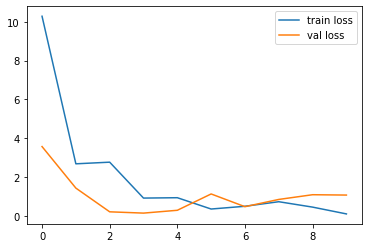

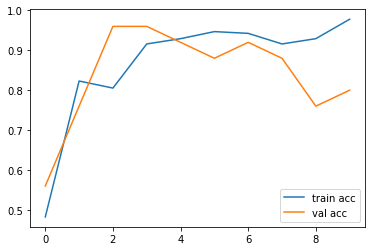

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import load_model
img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/0100.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
preds=np.argmax(classes, axis=1)

print(preds[0])

0


In [ ]:
y_actual=[]
y_test=[]

In [ ]:
from math import floor

In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Normal/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Normal/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==1):
        y_test.append(1)
    else:
        y_test.append(0)
    
    y_actual.append(1)
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==0):
        y_test.append(0)
    else:
        y_test.append(1)
        
    y_actual.append(0)
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Viral Pneumonia/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Viral Pneumonia/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==2):
        y_test.append(2)
    else:
        y_test.append(0)
        
    y_actual.append(2)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
print(y_actual)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(y_test)

[1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]


[[24  2  0]
 [ 3 17  0]
 [ 2  0 18]]


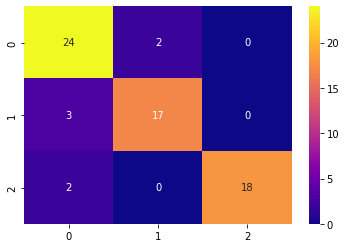

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)
print(cm)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.828     0.923     0.873        26
           1      0.895     0.850     0.872        20
           2      1.000     0.900     0.947        20

    accuracy                          0.894        66
   macro avg      0.907     0.891     0.897        66
weighted avg      0.900     0.894     0.895        66



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_test)

0.8939393939393939